Starting setup:
    
Use the traditional 100 people, capacity of 60.

Strategy:
Go if:
1) You went last time and it wasn't too crowded OR
2) Your friend went last time and it wasn't too crowded OR
3) Small random chance

In [1]:
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np
import numpy.ma as ma

In [95]:
sizes = [20, 50, 30]
probs = [[0.25,0.01, 0.01], [0.01, 0.1, 0.01], [0.01, 0.01, 1/6]]
G = nx.stochastic_block_model(sizes, probs, seed=30)
A = nx.convert_matrix.to_numpy_matrix(G)

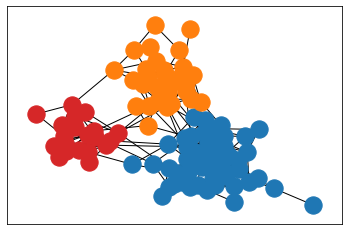

In [97]:
pos = nx.spring_layout(G, seed=3113794652)
nx.draw_networkx_nodes(G, pos, nodelist=range(0,sizes[0]), node_color="tab:red")
nx.draw_networkx_nodes(G, pos, nodelist=range(sizes[0], sizes[0]+sizes[1]), node_color="tab:blue")
nx.draw_networkx_nodes(G, pos, nodelist=range(sizes[0]+sizes[1], 100), node_color="tab:orange")
nx.draw_networkx_edges(G, pos)

In [15]:
A[:20, :20].sum(axis=0).mean()

4.6

In [16]:
A[20:70, 20:70].sum(axis=0).mean()

5.2

In [17]:
A[70:, 70:].sum(axis=0).mean()

5.133333333333334

In [18]:
A.sum(axis=0).mean()

8.08

In [21]:
k = A.sum(axis=0)
k.sort()
k

matrix([[ 3.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,  5.,  5.,  5.,
          5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
          6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
          7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,
          8.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
          9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 10., 10., 10., 10., 10.,
         10., 10., 10., 10., 10., 11., 11., 11., 11., 11., 11., 11., 12.,
         12., 12., 12., 13., 13., 14., 15., 15., 15.]])

In [98]:
rng = np.random.default_rng()

# random initial conditions
X = rng.uniform(size=(100,1)) < 0.3
Xs = [X]
eps = 0.03

for _ in range(100):
    if X.sum() < 60:
        X  = A.dot(X) > 0
    else:
        X = np.zeros(shape=(100,1))

    X += rng.uniform(size=(100,1)) < eps
    Xs.append(X)
    

Text(0.5, 1.0, 'Attendance by week')

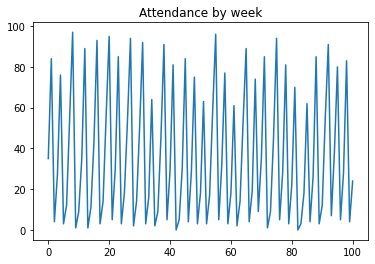

In [114]:
plt.plot([X.sum() for X in Xs])
plt.title("Attendance by week")

Text(0.5, 1.0, 'Average friend count of attendees')

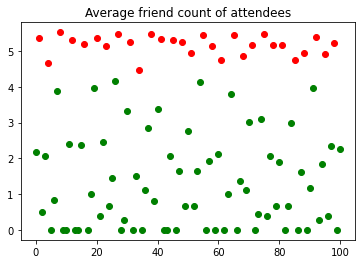

In [161]:
def count_friends(A, X):
    fcs = A.dot(X)[np.where(X)[0]]
    if len(fcs) == 0:
        return 0
    return fcs.mean()

def plot_mask(t, friends, mask, color):
    x = np.take(t, np.where(mask))
    y = np.take(friends, np.where(mask))
    plt.scatter(x=x, y=y,color=color)
    

friends = [count_friends(A, X) for X in Xs]
too_full = [X.sum() > 60 for X in Xs]

t = range(len(friends))

# plot when too full
#x = np.take(t, np.where(too_full))
# Ey = np.take(friends, np.where(too_full))
#Eplt.scatter(x=x, y=y)
plot_mask(t, friends, too_full, "r")
plot_mask(t, friends, [~c for c in too_full], "g")
plt.title("Average friend count of attendees")

In [217]:
friends[:10]

[2.1714285714285713,
 5.357142857142857,
 0.5,
 2.074074074074074,
 4.657894736842105,
 0.0,
 0.8333333333333334,
 3.888888888888889,
 5.525773195876289,
 0.0]

Text(0.5, 1.0, 'Average friend count of attendees')

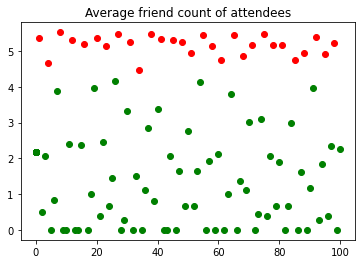

In [300]:
Xnp = np.hstack(Xs)

# col j has the number of friends of each node
# that attended on week j
# mask agents that did not attend
fma = ma.masked_array(A.dot(Xnp), 1-Xnp)
# mean friend count per week
weekly_friends = np.ravel(fma.mean(axis=0).data)
too_full = Xnp.sum(axis=0) > 60

t = range(len(friends))
plot_mask(t, friends, too_full, "r")
plot_mask(t, friends, [~c for c in too_full], "g")
plt.title("Average friend count of attendees")

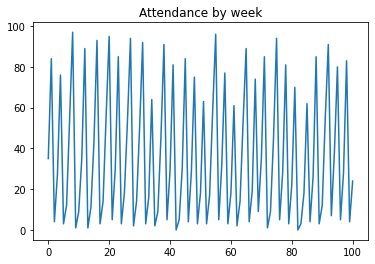

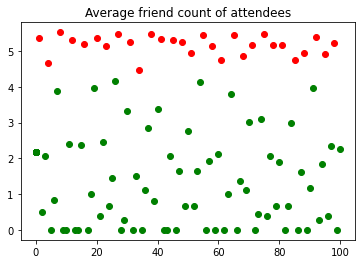

In [307]:
def summarize_run(Xs):
    Xnp = np.hstack(Xs)
    attendance = np.ravel(Xnp.sum(axis=0))
    
    plt.figure()
    plt.plot(attendance)
    plt.title("Attendance by week")
    
    plt.figure()
    
    friends = [count_friends(A, X) for X in Xs]
    too_full = attendance > 60

    # col j has the number of friends of each node
    # that attended on week j
    # mask agents that did not attend
    fma = ma.masked_array(A.dot(Xnp), 1-Xnp)
    # mean friend count per week
    weekly_friends = np.ravel(fma.mean(axis=0).data)
    too_full = Xnp.sum(axis=0) > 60

    t = range(len(friends))
    plot_mask(t, friends, too_full, "r")
    plot_mask(t, friends, [~c for c in too_full], "g")
    plt.title("Average friend count of attendees")

    
summarize_run(Xs)

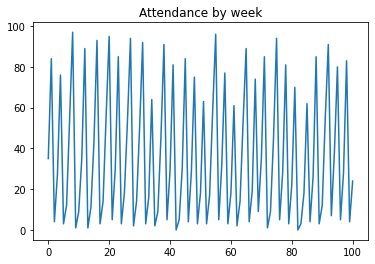

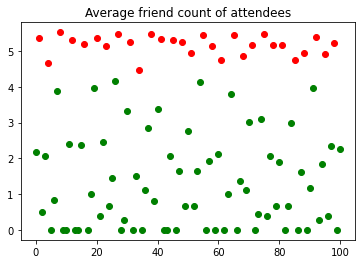

In [164]:
def summarize_run(Xs):
    plt.figure()
    plt.plot([X.sum() for X in Xs])
    plt.title("Attendance by week")
    
    plt.figure()
    
    friends = [count_friends(A, X) for X in Xs]
    too_full = [X.sum() > 60 for X in Xs]

    t = range(len(friends))

    # plot when too full
    #x = np.take(t, np.where(too_full))
    # Ey = np.take(friends, np.where(too_full))
    #Eplt.scatter(x=x, y=y)
    plot_mask(t, friends, too_full, "r")
    plot_mask(t, friends, [~c for c in too_full], "g")
    plt.title("Average friend count of attendees")
    
summarize_run(Xs)

If your utility is proportional to the number of your friends who were there with you then total utility is

u(t) = -X(t) if too full
sum(friends(t)) otherwise

So what happens here is that it grows really fast and then history is completely reset every time the bar is too crowded.  I want this reset rule will never converge on any kind of stability.  We need something that preferentially allows stable groups to attend repeatedly or together.

This is where memory comes in I guess?  If every agent has a memory then 

1. You regret going if none of your friends went.
2. You regret going if too crowded.
3. Otherwise you are glad you went

So we track 2 things (3 things?)  Went?  Regrettted?

If none of your friends went, but it wasn't too crowded, invite a friend?  Welll let's stick with invite all your friends every time but say that if you regret going more than half the time you will give up except for the small random probability.

In [112]:
rng = np.random.default_rng()

# random initial conditions
X = rng.uniform(size=(100,1)) < 0.3
Xs = [X]
eps = 0.03

for _ in range(100):
    # it wasn't too crowded
    if X.sum() < 60:
        X  = A.dot(X) > 0
    else:
        X = np.zeros(shape=(100,1))

    X += rng.uniform(size=(100,1)) < eps
    Xs.append(X)
    

In [113]:
# how can I test whose friends were there
pd.Series(np.ravel(A.dot(X))).value_counts()

1.0    41
0.0    21
2.0    21
3.0     8
5.0     4
4.0     3
8.0     1
7.0     1
dtype: int64

In [109]:
Xs[-3]

matrix([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [ True],
        [False],
        [ True